In [1]:
import os
import pathlib

In [2]:
import pandas

In [3]:
import iris
import xarray

In [4]:
root_dir = pathlib.Path(os.environ['SCRATCH']) / 'precip_rediagnosis' / 'storm_dennis_6hr_lt'

In [5]:
fname_merged = 'prd_merged_20200214T1800Z_20200217T1200Z.csv'

In [6]:
path_merged = root_dir / fname_merged
print(path_merged.is_file())
path_merged

True


PosixPath('/scratch/shaddad/precip_rediagnosis/storm_dennis_6hr_lt/prd_merged_20200214T1800Z_20200217T1200Z.csv')

In [7]:
prd_merged_df = pandas.read_csv(path_merged)


In [8]:
prd_merged_df

,time,latitude,longitude,radar_fraction_in_band_aggregate_3hr_0.0,radar_fraction_in_band_aggregate_3hr_0.03,radar_fraction_in_band_instant_0.03,radar_fraction_in_band_aggregate_3hr_0.09,radar_fraction_in_band_instant_0.09,radar_fraction_in_band_aggregate_3hr_0.1,radar_fraction_in_band_instant_0.1,...,wind_speed_2750.0,wind_speed_3000.0,wind_speed_3250.0,wind_speed_3500.0,wind_speed_3750.0,wind_speed_4000.0,wind_speed_4500.0,wind_speed_5000.0,wind_speed_5500.0,wind_speed_6000.0
0,2020-02-14 18:00:00,49.21875,-5.765625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.3125,22.6875,23.5000,25.0000,27.1250,29.7500,31.6250,33.1250,32.9375,32.1250
1,2020-02-14 18:00:00,49.21875,-5.765625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.6250,22.4375,22.3125,22.6250,23.8125,26.0625,29.6875,31.6250,32.7500,31.8750
2,2020-02-14 18:00:00,49.21875,-5.765625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.9375,23.3125,24.0625,25.8125,27.9375,29.6250,30.3125,32.9375,33.6250,33.3750
3,2020-02-14 18:00:00,49.21875,-5.765625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.9375,23.3125,23.5625,24.2500,25.7500,28.2500,30.3750,30.8750,31.0625,31.0625
4,2020-02-14 18:00:00,49.21875,-5.765625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0000,22.1875,23.2500,25.2500,27.3750,28.9375,30.9375,32.8750,32.5625,32.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268483,2020-02-17 12:00:00,57.28125,-4.359375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.8750,28.3125,28.7500,29.2500,29.9375,30.8125,32.8125,33.1875,31.7500,29.8750
268484,2020-02-17 12:00:00,57.28125,-4.359375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.0000,28.2500,28.2500,28.3125,28.6875,29.3750,31.9375,34.1875,34.3125,33.8125
268485,2020-02-17 12:00:00,57.28125,-4.359375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.3125,26.7500,27.0625,27.3750,27.8125,28.4375,30.5000,32.1250,33.6250,35.3125
268486,2020-02-17 12:00:00,57.28125,-4.359375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.7500,29.8125,29.8750,30.2500,31.0000,32.0000,33.4375,33.3125,33.8125,35.1875


In [9]:
prd_merged_df[[c1 for c1 in prd_merged_df.columns if 'fraction' in c1 and 'inst' in c1]].sum(axis=1)

0         0.065421
1         0.065421
2         0.065421
3         0.065421
4         0.065421
            ...   
268483    0.000000
268484    0.000000
268485    0.000000
268486    0.000000
268487    0.000000
Length: 268488, dtype: float64

In [130]:
prd_merged_df[(prd_merged_df['radar_mean_rain_aggregate_3hr'] < 1e-4)]['radar_fraction_in_band_aggregate_3hr_0.0'].value_counts()

1.000000    56520
0.997297       18
0.997436       18
0.997268       18
0.997619       18
0.997494       18
Name: radar_fraction_in_band_aggregate_3hr_0.0, dtype: int64

In [12]:
prd_merged_df[(prd_merged_df['radar_mean_rain_instant'] < 1e-4)]['radar_fraction_in_band_instant_0.3'].value_counts()

0.0    132840
Name: radar_fraction_in_band_instant_0.3, dtype: int64

In [14]:
(prd_merged_df[(prd_merged_df['radar_mean_rain_instant'] < 1e-4)][[c1 for c1 in prd_merged_df.columns if 'fraction' in c1 and 'inst' in c1]].sum(axis=1) < 1e4).sum()

132840

In [15]:
prd_merged_df[(prd_merged_df['radar_mean_rain_instant'] >= 1e-4)][[c1 for c1 in prd_merged_df.columns if 'fraction' in c1 and 'inst' in c1]].sum(axis=1).value_counts()

1.000000    11574
1.000000    10656
1.000000     6624
1.000000     4824
1.000000     2772
            ...  
0.942356       18
0.870000       18
0.903941       18
0.995086       18
0.152482       18
Length: 4992, dtype: int64

In [16]:
print(len([c1 for c1 in prd_merged_df.columns if 'radar' in c1 and 'instant' in c1]))
[c1 for c1 in prd_merged_df.columns if 'radar' in c1 and 'instant' in c1]

24


['radar_fraction_in_band_instant_0.03',
 'radar_fraction_in_band_instant_0.09',
 'radar_fraction_in_band_instant_0.1',
 'radar_fraction_in_band_instant_0.25',
 'radar_fraction_in_band_instant_0.3',
 'radar_fraction_in_band_instant_0.5',
 'radar_fraction_in_band_instant_1.0',
 'radar_fraction_in_band_instant_2.0',
 'radar_fraction_in_band_instant_3.0',
 'radar_fraction_in_band_instant_4.0',
 'radar_fraction_in_band_instant_8.0',
 'radar_fraction_in_band_instant_12.0',
 'radar_fraction_in_band_instant_16.0',
 'radar_fraction_in_band_instant_20.0',
 'radar_fraction_in_band_instant_25.0',
 'radar_fraction_in_band_instant_30.0',
 'radar_fraction_in_band_instant_40.0',
 'radar_fraction_in_band_instant_50.0',
 'radar_fraction_in_band_instant_75.0',
 'radar_fraction_in_band_instant_100.0',
 'radar_fraction_in_band_instant_150.0',
 'radar_fraction_in_band_instant_200.0',
 'radar_mean_rain_instant',
 'radar_max_rain_instant']

In [17]:
print(len([c1 for c1 in prd_merged_df.columns if 'radar' in c1 and 'agg' in c1]))
[c1 for c1 in prd_merged_df.columns if 'radar' in c1 and 'agg' in c1]

25


['radar_fraction_in_band_aggregate_3hr_0.0',
 'radar_fraction_in_band_aggregate_3hr_0.03',
 'radar_fraction_in_band_aggregate_3hr_0.09',
 'radar_fraction_in_band_aggregate_3hr_0.1',
 'radar_fraction_in_band_aggregate_3hr_0.25',
 'radar_fraction_in_band_aggregate_3hr_0.3',
 'radar_fraction_in_band_aggregate_3hr_0.5',
 'radar_fraction_in_band_aggregate_3hr_1.0',
 'radar_fraction_in_band_aggregate_3hr_2.0',
 'radar_fraction_in_band_aggregate_3hr_3.0',
 'radar_fraction_in_band_aggregate_3hr_4.0',
 'radar_fraction_in_band_aggregate_3hr_8.0',
 'radar_fraction_in_band_aggregate_3hr_12.0',
 'radar_fraction_in_band_aggregate_3hr_16.0',
 'radar_fraction_in_band_aggregate_3hr_20.0',
 'radar_fraction_in_band_aggregate_3hr_25.0',
 'radar_fraction_in_band_aggregate_3hr_30.0',
 'radar_fraction_in_band_aggregate_3hr_40.0',
 'radar_fraction_in_band_aggregate_3hr_50.0',
 'radar_fraction_in_band_aggregate_3hr_75.0',
 'radar_fraction_in_band_aggregate_3hr_100.0',
 'radar_fraction_in_band_aggregate_3hr_150

In [18]:
prd_merged_df[[c1 for c1 in prd_merged_df.columns if 'fraction' in c1 and 'agg' in c1]].sum(axis=1).value_counts()

1.000000    106218
1.000000     58140
1.000000     57744
1.000000     27900
1.000000     13788
1.000000      3276
1.000000       774
1.000000       504
1.000000        54
1.000000        54
1.002392        18
1.002809        18
dtype: int64

In [19]:
cl1 = iris.load(str(root_dir / 'prd_radar_20200214T1800Z_20200217T1800Z.nc'))
cl1 

[<iris 'Cube' of maximum rain in radar cells within mogreps-g cell / (mm) (time: 12; latitude: 52; longitude: 31)>,
<iris 'Cube' of Fraction radar rainfall cells in specified rain band / (unknown) (time: 12; latitude: 52; longitude: 31; band: 23)>,
<iris 'Cube' of average rain in radar cells within mogreps-g cell / (mm) (time: 12; latitude: 52; longitude: 31)>,
<iris 'Cube' of average rain in radar cells within mogreps-g cell / (mm) (time: 12; latitude: 52; longitude: 31)>,
<iris 'Cube' of maximum rain in radar cells within mogreps-g cell / (mm) (time: 12; latitude: 52; longitude: 31)>,
<iris 'Cube' of num_radar_cells / (unknown) (latitude: 52; longitude: 31)>,
<iris 'Cube' of Fraction radar rainfall cells in specified rain band / (unknown) (time: 12; latitude: 52; longitude: 31; band: 23)>]

In [20]:
prd_radar_df = pandas.read_csv(str(root_dir / 'prd_radar_20200214T1800Z_20200217T1800Z.csv'))
prd_radar_df


,time,latitude,longitude,radar_fraction_in_band_aggregate_3hr_0.0,radar_fraction_in_band_aggregate_3hr_0.03,radar_fraction_in_band_instant_0.03,radar_fraction_in_band_aggregate_3hr_0.09,radar_fraction_in_band_instant_0.09,radar_fraction_in_band_aggregate_3hr_0.1,radar_fraction_in_band_instant_0.1,...,radar_fraction_in_band_aggregate_3hr_100.0,radar_fraction_in_band_instant_100.0,radar_fraction_in_band_aggregate_3hr_150.0,radar_fraction_in_band_instant_150.0,radar_fraction_in_band_aggregate_3hr_200.0,radar_fraction_in_band_instant_200.0,radar_mean_rain_aggregate_3hr,radar_max_rain_aggregate_3hr,radar_mean_rain_instant,radar_max_rain_instant
0,2020-02-14 18:00:00,49.21875,-5.765625,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333577,0.502604,0.050672,1.28125
1,2020-02-14 18:00:00,49.21875,-5.484375,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.241950,0.434896,0.160047,0.96875
2,2020-02-14 18:00:00,49.21875,-5.203125,0.079625,0.032787,0.0,0.440281,0.0,0.063232,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.091829,0.221354,0.000000,0.00000
3,2020-02-14 18:00:00,49.21875,-4.921875,0.576744,0.093023,0.0,0.330233,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.024285,0.083333,0.000000,0.00000
4,2020-02-14 18:00:00,49.21875,-4.640625,0.983645,0.011682,0.0,0.004673,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002117,0.039062,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14911,2020-02-17 12:00:00,57.28125,-5.484375,0.028571,0.006349,0.0,0.028571,0.0,0.006349,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.770155,2.848958,0.126687,2.18750
14912,2020-02-17 12:00:00,57.28125,-5.203125,0.517730,0.003546,0.0,0.141844,0.0,0.010638,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.102781,0.617188,0.208223,2.53125
14913,2020-02-17 12:00:00,57.28125,-4.921875,0.653509,0.004386,0.0,0.070175,0.0,0.008772,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.088188,0.471354,0.000000,0.00000
14914,2020-02-17 12:00:00,57.28125,-4.640625,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000


In [21]:
print(len([c1 for c1 in prd_radar_df.columns if 'radar' in c1 and 'instant' in c1]))
[c1 for c1 in prd_radar_df.columns if 'radar' in c1 and 'instant' in c1]

24


['radar_fraction_in_band_instant_0.03',
 'radar_fraction_in_band_instant_0.09',
 'radar_fraction_in_band_instant_0.1',
 'radar_fraction_in_band_instant_0.25',
 'radar_fraction_in_band_instant_0.3',
 'radar_fraction_in_band_instant_0.5',
 'radar_fraction_in_band_instant_1.0',
 'radar_fraction_in_band_instant_2.0',
 'radar_fraction_in_band_instant_3.0',
 'radar_fraction_in_band_instant_4.0',
 'radar_fraction_in_band_instant_8.0',
 'radar_fraction_in_band_instant_12.0',
 'radar_fraction_in_band_instant_16.0',
 'radar_fraction_in_band_instant_20.0',
 'radar_fraction_in_band_instant_25.0',
 'radar_fraction_in_band_instant_30.0',
 'radar_fraction_in_band_instant_40.0',
 'radar_fraction_in_band_instant_50.0',
 'radar_fraction_in_band_instant_75.0',
 'radar_fraction_in_band_instant_100.0',
 'radar_fraction_in_band_instant_150.0',
 'radar_fraction_in_band_instant_200.0',
 'radar_mean_rain_instant',
 'radar_max_rain_instant']

In [22]:
cl1[2]

Average Rain In Radar Cells Within Mogreps-G Cell (mm),time,latitude,longitude
Shape,12,52,31
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-
longitude,-,-,x
Attributes,,,Conventions CF-1.7


In [47]:
import functools


In [50]:
df_agg  = xarray.DataArray.from_iris(cl1[6]).to_dataframe().reset_index()
agg_name = cl1[6].var_name
df_instant = xarray.DataArray.from_iris(cl1[1]).to_dataframe().reset_index()
instant_name = cl1[1].var_name

In [61]:
len([df_agg[df_agg[agg_name] == b1].rename({agg_name: f'{agg_name}_{b1:.2f}'},axis='columns') for b1 in df_agg['band'].unique()])


23

In [64]:
[df_agg[df_agg[agg_name] == b1].rename({agg_name: f'{agg_name}_{b1:.2f}'},axis='columns') for b1 in df_agg['band'].unique()][2]

,time,latitude,longitude,band,radar_fraction_in_band_aggregate_3hr_0.09
197698,2020-02-16 00:00:00,52.40625,-3.515625,16.0,0.09
309428,2020-02-16 18:00:00,52.40625,2.671875,3.0,0.09


In [100]:
%%time 
radar_merged = pandas.merge(
    functools.reduce(lambda x,y: pandas.merge(x,y, on=('latitude','longitude','time')), 
                         (xarray.DataArray.from_iris(arr1).to_dataframe().reset_index()[['latitude','longitude','time',arr1.var_name ]] for arr1 in [cl1[0],cl1[2],cl1[3],cl1[4]]) ), 
    pandas.merge(
        functools.reduce(lambda x,y: pandas.merge(x,y, on=('latitude','longitude','time')), 
                         [df_agg[df_agg['band'] == b1].rename({agg_name: f'{agg_name}_{b1:.2f}'},axis='columns')[['latitude','longitude','time',f'{agg_name}_{b1:.2f}']]
                          for b1 in df_agg['band'].unique()]),
        functools.reduce(lambda x,y: pandas.merge(x,y, on=('latitude','longitude','time')), 
                         [df_instant[df_instant['band'] == b1].rename({instant_name: f'{instant_name}_{b1:.2f}'},axis='columns')[['latitude','longitude','time',f'{instant_name}_{b1:.2f}']]
                          for b1 in df_instant['band'].unique()]),
        on=('latitude','longitude','time'),
    ),
    on=('latitude','longitude','time'),
)

CPU times: user 1.05 s, sys: 60.1 ms, total: 1.11 s
Wall time: 1.11 s


In [104]:
radar_merged = radar_merged[radar_merged['radar_max_rain_instant'].isna() == False]

In [117]:
radar_merged

,latitude,longitude,time,radar_max_rain_aggregate_3hr,radar_mean_rain_aggregate_3hr,radar_mean_rain_instant,radar_max_rain_instant,radar_fraction_in_band_aggregate_3hr_0.00,radar_fraction_in_band_aggregate_3hr_0.03,radar_fraction_in_band_aggregate_3hr_0.09,...,radar_fraction_in_band_instant_16.00,radar_fraction_in_band_instant_20.00,radar_fraction_in_band_instant_25.00,radar_fraction_in_band_instant_30.00,radar_fraction_in_band_instant_40.00,radar_fraction_in_band_instant_50.00,radar_fraction_in_band_instant_75.00,radar_fraction_in_band_instant_100.00,radar_fraction_in_band_instant_150.00,radar_fraction_in_band_instant_200.00
0,49.21875,-5.765625,2020-02-14 18:00:00,0.502604,0.333577,0.050672,1.28125,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49.21875,-5.484375,2020-02-14 18:00:00,0.434896,0.241950,0.160047,0.96875,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49.21875,-5.203125,2020-02-14 18:00:00,0.221354,0.091829,0.000000,0.00000,0.079625,0.032787,0.440281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49.21875,-4.921875,2020-02-14 18:00:00,0.083333,0.024285,0.000000,0.00000,0.576744,0.093023,0.330233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49.21875,-4.640625,2020-02-14 18:00:00,0.039062,0.002117,0.000000,0.00000,0.983645,0.011682,0.004673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19066,57.28125,-5.484375,2020-02-17 12:00:00,2.848958,0.770155,0.126687,2.18750,0.028571,0.006349,0.028571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19067,57.28125,-5.203125,2020-02-17 12:00:00,0.617188,0.102781,0.208223,2.53125,0.517730,0.003546,0.141844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19068,57.28125,-4.921875,2020-02-17 12:00:00,0.471354,0.088188,0.000000,0.00000,0.653509,0.004386,0.070175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19069,57.28125,-4.640625,2020-02-17 12:00:00,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
model_merged = pandas.read_csv(root_dir / 'mogreps-g' / 'prd_mogreps_g_006H_20200214T1800Z_20200217T1200Z.csv')

In [111]:
model_merged['time'] = pandas.to_datetime(model_merged['time'])

In [122]:
prd_merged = pandas.merge(radar_merged, model_merged, on=('latitude','longitude','time'), )

In [123]:
prd_merged

,latitude,longitude,time,radar_max_rain_aggregate_3hr,radar_mean_rain_aggregate_3hr,radar_mean_rain_instant,radar_max_rain_instant,radar_fraction_in_band_aggregate_3hr_0.00,radar_fraction_in_band_aggregate_3hr_0.03,radar_fraction_in_band_aggregate_3hr_0.09,...,wind_speed_2750.0,wind_speed_3000.0,wind_speed_3250.0,wind_speed_3500.0,wind_speed_3750.0,wind_speed_4000.0,wind_speed_4500.0,wind_speed_5000.0,wind_speed_5500.0,wind_speed_6000.0
0,49.21875,-5.765625,2020-02-14 18:00:00,0.502604,0.333577,0.050672,1.28125,0.0,0.0,0.0,...,22.3125,22.6875,23.5000,25.0000,27.1250,29.7500,31.6250,33.1250,32.9375,32.1250
1,49.21875,-5.765625,2020-02-14 18:00:00,0.502604,0.333577,0.050672,1.28125,0.0,0.0,0.0,...,22.6250,22.4375,22.3125,22.6250,23.8125,26.0625,29.6875,31.6250,32.7500,31.8750
2,49.21875,-5.765625,2020-02-14 18:00:00,0.502604,0.333577,0.050672,1.28125,0.0,0.0,0.0,...,22.9375,23.3125,24.0625,25.8125,27.9375,29.6250,30.3125,32.9375,33.6250,33.3750
3,49.21875,-5.765625,2020-02-14 18:00:00,0.502604,0.333577,0.050672,1.28125,0.0,0.0,0.0,...,22.9375,23.3125,23.5625,24.2500,25.7500,28.2500,30.3750,30.8750,31.0625,31.0625
4,49.21875,-5.765625,2020-02-14 18:00:00,0.502604,0.333577,0.050672,1.28125,0.0,0.0,0.0,...,22.0000,22.1875,23.2500,25.2500,27.3750,28.9375,30.9375,32.8750,32.5625,32.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267727,57.28125,-4.359375,2020-02-17 12:00:00,0.000000,0.000000,0.000000,0.00000,1.0,0.0,0.0,...,27.8750,28.3125,28.7500,29.2500,29.9375,30.8125,32.8125,33.1875,31.7500,29.8750
267728,57.28125,-4.359375,2020-02-17 12:00:00,0.000000,0.000000,0.000000,0.00000,1.0,0.0,0.0,...,28.0000,28.2500,28.2500,28.3125,28.6875,29.3750,31.9375,34.1875,34.3125,33.8125
267729,57.28125,-4.359375,2020-02-17 12:00:00,0.000000,0.000000,0.000000,0.00000,1.0,0.0,0.0,...,26.3125,26.7500,27.0625,27.3750,27.8125,28.4375,30.5000,32.1250,33.6250,35.3125
267730,57.28125,-4.359375,2020-02-17 12:00:00,0.000000,0.000000,0.000000,0.00000,1.0,0.0,0.0,...,29.7500,29.8125,29.8750,30.2500,31.0000,32.0000,33.4375,33.3125,33.8125,35.1875


In [120]:
radar_merged.shape[0] * 18

267732

/home/h01/shaddad/.conda/envs/prd_data_prep/lib/python3.8/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/h01/shaddad/.conda/envs/prd_data_prep/lib/python3.8/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/home/h01/shaddad/.conda/envs/prd_data_prep/lib/python3.8/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/h01/shaddad/.conda/envs/prd_data_prep/lib/python3.8/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


<AxesSubplot:>

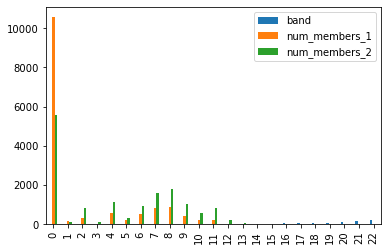

In [37]:
pandas.DataFrame({
    'band': cl1[1].coord('band').points, 
    'num_members_1': cl1[1].collapsed(['time','latitude','longitude'],iris.analysis.SUM).data.data,
    'num_members_2': cl1[6].collapsed(['time','latitude','longitude'],iris.analysis.SUM).data.data
}).plot.bar()

In [132]:
prd_merged[[c1 for c1 in prd_merged.columns if 'instant' in c1 and 'fraction' in c1]].sum(axis='columns').value_counts()

1.000000    232056
1.000000     25848
1.000000      6300
1.000000      3384
1.000000       108
1.002268        18
1.002375        18
dtype: int64

In [131]:
prd_merged[[c1 for c1 in prd_merged.columns if 'agg' in c1 and 'fraction' in c1]].sum(axis='columns').value_counts()

1.000000    231642
1.000000     29088
1.000000      5130
1.000000      1836
1.002392        18
1.002809        18
dtype: int64

In [136]:
prd_merged.to_csv(root_dir / fname_merged )

In [135]:
radar_merged.to_csv(root_dir / 'prd_radar_20200214T1800Z_20200217T1800Z.csv')